In [1]:
!python --version

Python 3.8.12


# <span style="font-family:AppleGothic; font-weight:bolder"><a href="https://dacon.io/competitions/official/235905/codeshare/5138?page=1&dtype=recent">[DACON]_음성 데이터 EDA</a></span>

- 이번 대회는 음성 데이터를 이용하여 0~9 까지 숫자를 분류하는 대회이다.

- DACON에서 제공하는 코드를 따라해보면서 음성 데이터 분석 과정을 살펴보도록 한다.

In [2]:
# 라이브러리 불러오기
import os
import platform

import warnings
warnings.filterwarnings(action = "ignore")

# 오디오 전처리를 위한 라이브러리
import librosa
import librosa.display as dsp
from IPython.display import Audio

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 옵션 지정
if platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
else:
    plt.rcParams["font.family"] = "AppleGothic"

plt.rcParams["axes.unicode_minus"] = False

# <span style="color:CornflowerBlue; font-family:AppleGothic; font-weight:bolder">1. CSV 파일 EDA</span>

---

In [4]:
# Train 데이터 불러오기
train = pd.read_csv("./data/train.csv")

print("Shape of train data :", train.shape, "\n")
display(train.head())

Shape of train data : (400, 2) 



,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0


- 학습 데이터는 400개의 행과 3개의 열로 이루어져 있다.

- 이제 각각 라벨이 몇개씩 있는지 확인해보도록 하자.

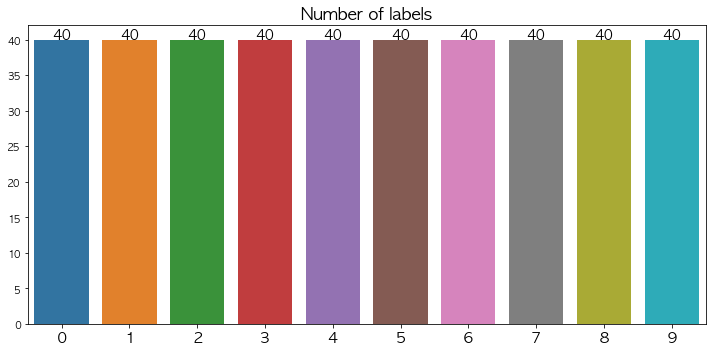

In [5]:
# 시각화를 통해 확인
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(train["label"], ax = ax)
ax.set_xlabel("")
ax.set_xticklabels(labels = np.unique(train["label"]), fontsize = 15)
ax.set_ylabel("")
ax.set_title("Number of labels", fontsize = 17)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), ha = "center", fontsize = 14)

fig.tight_layout()

- 0~9의 모든 숫자가 균일하게 40개씩 분포해있음을 확인할 수 있다.

# <span style="color:CornflowerBlue; font-family:AppleGothic; font-weight:bolder">2. WAV 파일 EDA</span>

---

- 이제 음성 파일로부터 간단히 0~9까지 데이터를 하나씩 추출하여 소리를 들어보도록 하자.

In [6]:
# 오디오 데이터를 시각화하고 음성을 확인할 수 있는 함수 생성
def get_audio(label = 0):
    
    ## Audio Sample Directory
    sample = os.listdir("./data/train")
    
    # 학습 데이터에서 'label' 매개변수에 입력된 값과 일치하는 'file_name' 가져오기
    temp = train[train["label"] == label]["file_name"]
    
    # 첫번째 값 가져오기
    file_name = temp[temp.index[0]]
    
    # WAV 파일 경로 가져오기
    file = "./data/train/" + file_name
    
    ## Get Audio from the location
    data, sample_rate = librosa.load(file)
    
    ## Plot the audio wave
    dsp.waveshow(y = data, sr = sample_rate)
    plt.show()
    
    ## Show the widget
    return Audio(data = data, rate = sample_rate)

- 위 함수에서 사용된 코드를 하나씩 뜯어보며 자세히 살펴보도록 한다.

- 1️⃣ **`librosa.load()`** 함수는 오디오 파일을 불러오는 함수이며, [여기](https://librosa.org/doc/main/generated/librosa.load.html)를 클릭하면 함수의 자세한 설명을 확인할 수 있다.

> Load an audio file as a floating point time series.<br><br>Audio will be automatically resampled to the giver rate(default `sr=22050`)<br><br>To preserve the native sampling rate of the file, use `sr=None`

- 즉, 위의 설명을 통해 오디오 파일을 실수형 타입의 시계열로 불러오는 함수임을 알 수 있다.

- **`librosa.load()`** 함수의 반환값은 2개인데 하나는 **Numpy 배열의 time series**이며, 다른 하나는 **샘플링 레이트(Sampling rate)** 이다.<br><br>

- 여기서 **샘플링 레이트(Sampling rate)** 또는 **샘플링 주파수(Sampling frequency)** 는 무엇을 의미하는 것일까?

<span style="color:Green; font-weight:bolder">샘플링 레이트(Sampling rate)</span>

이산적인 신호를 만들기 위해 연속적 신호에서 얻어진 단위시간 당 샘플링 횟수를 정의한다. ([위키백과](https://ko.wikipedia.org/wiki/%EC%83%98%ED%94%8C%EB%A7%81_%EC%86%8D%EB%8F%84))

1초당 들리는 sample의 개수를 단위로 나타낸 것 ([티스토리](https://wiper2019.tistory.com/184))

Ex) Sample rate = 44.1 KHz : 1초에 sample의 수가 약 44100개 들어있다.

*신호처리에서 샘플링은 아날로그 데이터를 디지털 데이터로 추출하는 것을 의미한다.*

- 하나의 오디오 파일을 불러와서 확인해보도록 하자.

In [9]:
# 한 개의 데이터 불러오기
data, sample_rate = librosa.load("./data/train/" + os.listdir("./data/train")[0])

# 반환값 확인
print("Shape of Audio Time Series :", data.shape, "\n")
print("Type of Audio Time Series :", type(data), "\n")
print("Sampling Rate :", sample_rate, "\n")
print("Type of Sampling Rate :", type(sample_rate))

Shape of Audio Time Series : (12422,) 

Type of Audio Time Series : <class 'numpy.ndarray'> 

Sampling Rate : 22050 

Type of Sampling Rate : <class 'int'>


- 위의 결과를 통해 첫번째 반환값은 Numpy 배열이고, 두번째 반환값은 정수형 타입의 스칼라임을 확인할 수 있다.

- 또한, `sr` 매개변수에 값을 입력해주지 않았기 때문에 샘플링 레이트 값이 기본값인 **22050**임을 확인할 수 있다.

- 2️⃣ 다음으로 **`librosa.display.waveshow()`** 함수에 대해서 알아보도록 하자.

> Visualize a waveform in the time domain.

- **`librosa.display.waveshow()`** 함수는 시간 영역에서 오디오 파일을 시각화해주는 함수이다.

- `y` 매개변수에 **Numpy 배열의 Audio time series**를 넣어주고, `sr` 매개변수에 **샘플링 레이트**를 넣어주면 된다.

- 3️⃣ 마지막으로 **`IPython.display.Audio()`** 함수는 **오디오 객체를 생성**해주는 함수이다.

- 위의 함수를 사용하면 아래의 셀처험 해당 셀에 오디오 컨트롤이 표시된다.

In [17]:
# 임의의 데이터 확인
display(Audio(data = data, rate = sample_rate))

- 함수에서 사용된 각 함수들을 살펴보았으므로, `get_audio` 함수를 사용하여 0~9 까지의 음성을 확인해보도록 하자.

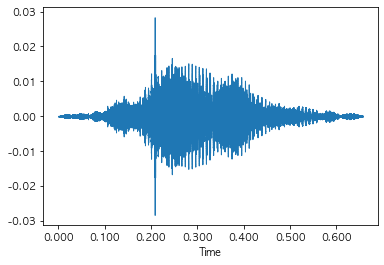

In [19]:
# 숫자 0의 음성
get_audio(label = 0)

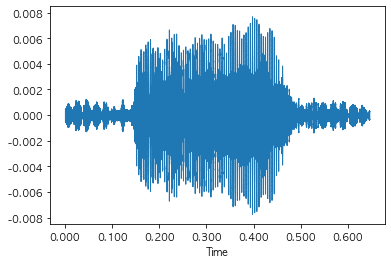

In [21]:
# 숫자 1의 음성
get_audio(label = 1)

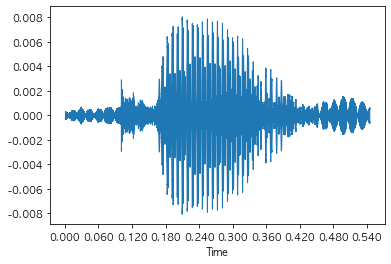

In [22]:
# 숫자 2의 음성
get_audio(label = 2)

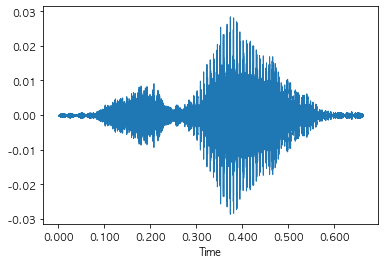

In [24]:
# 숫자 3의 음성
get_audio(label = 3)

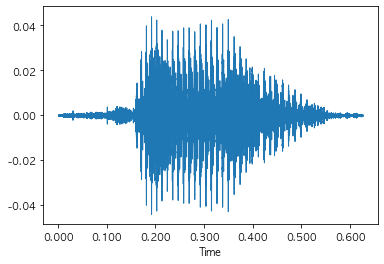

In [25]:
# 숫자 4의 음성
get_audio(label = 4)

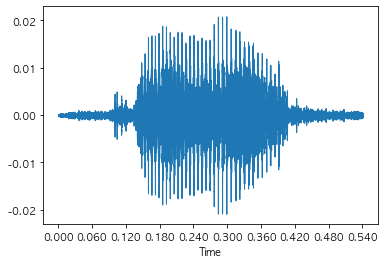

In [26]:
# 숫자 5의 음성
get_audio(label = 5)

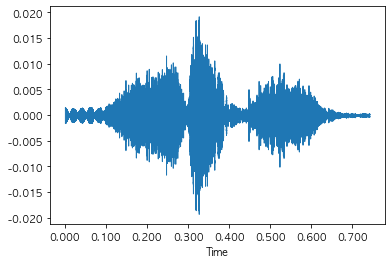

In [27]:
# 숫자 6의 음성
get_audio(label = 6)

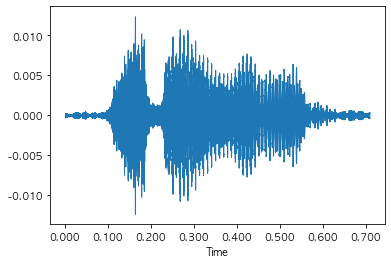

In [28]:
# 숫자 7의 음성
get_audio(label = 7)

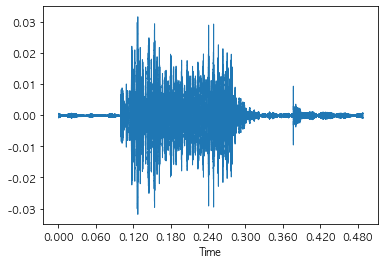

In [29]:
# 숫자 8의 음성
get_audio(label = 8)

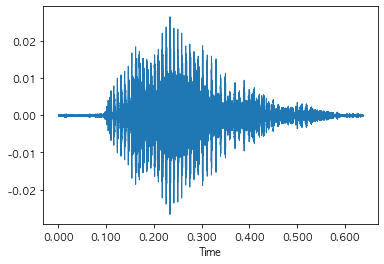

In [30]:
# 숫자 9의 음성
get_audio(label = 9)

# <span style="color:CornflowerBlue; font-family:AppleGothic; font-weight:bolder">3. 퓨리에 변환</span>

---

- 음성 데이터를 분석하기 위하여 주파수(frequency)를 성분을 뽑아내야 한다면 **퓨리에 변환(Fourier Transform)** 을 해야 한다.

- **퓨리에 변환**이란 **입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것**이다.

- 주기함수들을 분해함으로써 음성 데이터에서 노이즈 및 배경 소리로부터 유용한 소리의 데이터, 즉 **특징을 추출**하는 것이다.

- **FFT(Fast Fourier Transform)** 를 통해 원본 소리 데이터를 형성하는 주파수(frequency)의 정도를 파악하고 시각화를 해보도록 한다.

In [31]:
# 퓨리에 변환을 수행해주는 함수 생성
def fourier_transform(label = 0):
    
    # Audio Sample Directory
    # 샘플 오디오 파일의 경로를 불러오는 과정
    sample = os.listdir("./data/train")
    temp = train[train["label"] == label]["file_name"]
    file_name = temp[temp.index[0]]
    
    file = "./data/train/" + file_name
    
    # Get Audio from the location
    data, sample_rate = librosa.load(file)
    
    # Numpy의 퓨리에 변환 함수
    fft = np.fft.fft(data)
    
    

array([-0.09531168-1.43982049e-16j,  0.10621991-1.29634772e-02j,
        0.14777826+2.87276498e-02j, ...,  0.10640084+4.32502179e-04j,
        0.14777826-2.87276498e-02j,  0.10621991+1.29634772e-02j])